## Aplicação do algoritmo de PCA no Dataset Flavia Leaf

In [2]:
from numpy import array, cumsum
from pandas import read_csv
from matplotlib import pyplot as plt
from modules.dataset import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Realizando a leitura do Dataset a partir de um arquivo csv

In [3]:
dataset_flavia = read_csv("dataset_features.csv")
print(type(dataset_flavia))
print(dataset_flavia.head())

<class 'pandas.core.frame.DataFrame'>
    Arquivo      Área    Perímetro   Eixo Maior  Eixo Menor  Excentricidade  \
0  1001.jpg  198864.0  3488.450286  1563.713368  164.007374        0.994485   
1  1002.jpg  102116.0  2504.210245  1138.987993  115.058208        0.994885   
2  1003.jpg   87415.0  2301.440692  1049.594612  106.775515        0.994812   
3  1004.jpg  191411.0  2866.893578  1260.300089  197.112645        0.987694   
4  1005.jpg  229376.0  2929.248917  1213.008940  256.022020        0.977472   

    Solidez  Circularidade  Compacidade  Alongamento  Redondeza  Num Cantos  
0  0.980761       0.205353    61.194009     9.534409   0.103550           1  
1  0.973414       0.204627    61.411228     9.899233   0.100223           1  
2  0.974787       0.207394    60.591766     9.829918   0.101031           1  
3  0.976776       0.292653    42.939428     6.393806   0.153437           1  
4  0.957073       0.335927    37.408008     4.737909   0.198486           1  


Criando vetor de labels do dataset

In [4]:
labels, label_encoding = load_dataset_label_vector()

print(labels[0:5])
print(label_encoding)

[0, 0, 0, 0, 0]
['Pubescent Bamboo', 'Chinese Horse Chestnut', 'Chinese Redbud', 'True Indigo', 'Japanese Maple', 'Nanmu', 'Castor Aralia', 'Goldenrain Tree', 'Chinese Cinnamon', 'Anhui Barberry', 'Big-fruited Holly', 'Japanese Cheesewood', 'Wintersweet', 'Camphortree', 'Japan Arrowwood', 'Sweet Osmanthus', 'Deodar', 'Maidenhair Tree', 'Crape Myrtle', 'Oleander', 'Yew Plum Pine', 'Japanese Flowering Cherry', 'Glossy Privet', 'Chinese Toon', 'Peach', 'Ford Woodlotus', 'Trident Maple', 'Beales Barberry', 'Southern Magnolia', 'Canadian Poplar', 'Chinese Tulip Tree', 'Tangerine']


Ajustando dataset e labels para PCA

In [5]:
X = dataset_flavia.iloc[:,1:]
Y = array(labels)

print(X.head())
print(Y[0:5])

       Área    Perímetro   Eixo Maior  Eixo Menor  Excentricidade   Solidez  \
0  198864.0  3488.450286  1563.713368  164.007374        0.994485  0.980761   
1  102116.0  2504.210245  1138.987993  115.058208        0.994885  0.973414   
2   87415.0  2301.440692  1049.594612  106.775515        0.994812  0.974787   
3  191411.0  2866.893578  1260.300089  197.112645        0.987694  0.976776   
4  229376.0  2929.248917  1213.008940  256.022020        0.977472  0.957073   

   Circularidade  Compacidade  Alongamento  Redondeza  Num Cantos  
0       0.205353    61.194009     9.534409   0.103550           1  
1       0.204627    61.411228     9.899233   0.100223           1  
2       0.207394    60.591766     9.829918   0.101031           1  
3       0.292653    42.939428     6.393806   0.153437           1  
4       0.335927    37.408008     4.737909   0.198486           1  
[0 0 0 0 0]


Normalização do Dataset

In [6]:
x_scaler = StandardScaler()

x_fit = x_scaler.fit_transform(X)

print(x_fit[0:2])

[[-1.63332901 -0.58331777  0.82131088 -1.75648155  0.90364234  0.51025046
  -1.6682654   0.58097906  0.72214528 -1.60369205 -0.41120488]
 [-2.01538668 -2.0830318  -0.84969034 -1.94482763  0.90558647  0.44277689
  -1.67217469  0.58591142  0.77039669 -1.61837071 -0.41120488]]


Descobrindo a variância com PCA

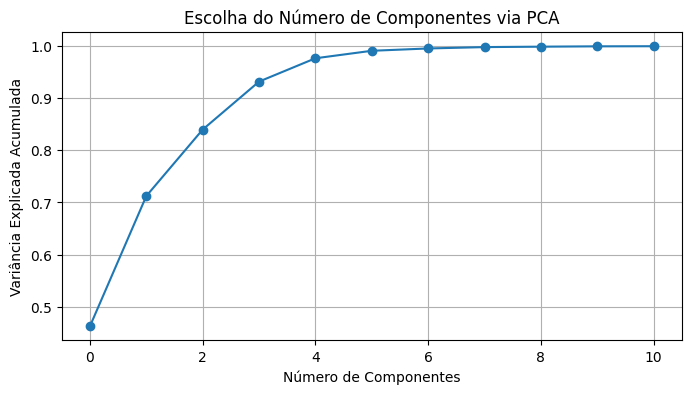

In [7]:
pca = PCA()
pca.fit(x_fit)

plt.figure(figsize=(8,4))
plt.plot(cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Escolha do Número de Componentes via PCA')
plt.grid(True)
plt.show()

Separabilidade usando duas componentes

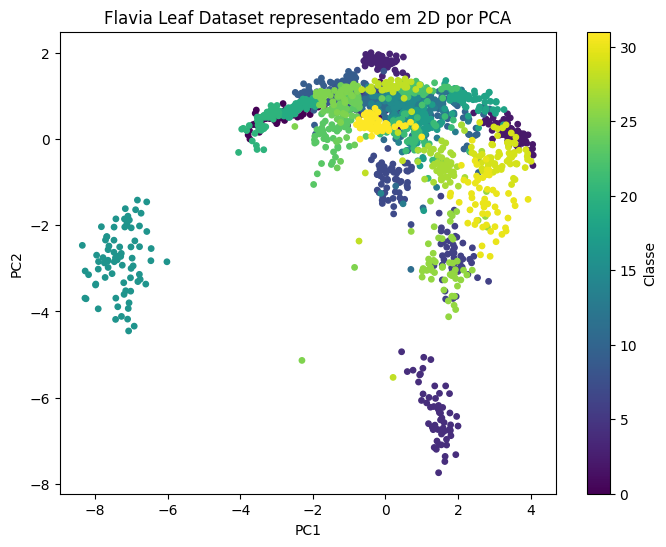

In [8]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(x_fit)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=Y, s=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Flavia Leaf Dataset representado em 2D por PCA')
plt.colorbar(label='Classe')
plt.show()